In [59]:
import os
import pandas as pd
import requests
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import re

In [ ]:

os.chdir(r"..\\Data")
directory=os.curdir

example_headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

url="https://datos.madrid.es/portal/site/egob/menuitem.ac61933d6ee3c31cae77ae7784f1a5a0/?vgnextoid=00149033f2201410VgnVCM100000171f5a0aRCRD&mgmtid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&search=keyword/trafico&preview=full&format=json"
response=requests.get(url,headers=example_headers)

response=response.json()
accidentes_trafico_años=response["result"]["items"][1]["distribution"]
year=1
for año in accidentes_trafico_años:
    URL_xlsx=año["accessURL"]
    nombre=año["title"]
    with open((directory+ "\\" +nombre+"_accidentes.xlsx"), 'wb') as f:
        response = requests.get(URL_xlsx,headers=example_headers)
        f.write(response.content)
        f.close()
    year=year+1

In [ ]:
os.chdir(r"..\\Data")
directory=os.curdir

example_headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}

url='https://datos.madrid.es/egob/catalogo/keyword/alcoholemia.json'
response=requests.get(url,headers=example_headers)

response=response.json()
accidentes_trafico_años=response["result"]["items"][0]["distribution"]
year=1
for año in accidentes_trafico_años:
    URL_xlsx=año["accessURL"]
    nombre=año["title"]
    with open((directory+ "\\" + nombre+"_policia.xlsx"), 'wb') as f:
        response = requests.get(URL_xlsx,headers=example_headers)
        f.write(response.content)
        f.close()
    year=year+1

In [ ]:
os.chdir(r"..\\Data")
directory=os.curdir
files=os.listdir(directory)
files=[directory+ '\\' +file for file in files if "accidentes" in file]
data=[]
for file in files:
    print(file)
    content=pd.read_excel(file)
    content.columns=['FECHA','RANGO HORARIO','DIA SEMANA','DISTRITO','LUGAR ACCIDENTE','Nº','Nº PARTE','CPFA Granizo','CPFA Hielo','CPFA Lluvia','CPFA Niebla','CPFA Seco','CPFA Nieve','CPSV Mojada','CPSV Aceite','CPSV Barro','CPSV Grava Suelta','CPSV Hielo','CPSV Seca Y Limpia','VICTIMAS','TIPO ACCIDENTE','Tipo Vehiculo','TIPO PERSONA','SEXO','LESIVIDAD','Tramo Edad']
    data.append(content)
merged_data=pd.concat(data)



In [ ]:
os.chdir(r"..\\Data")
directory=os.curdir
files=os.listdir(directory)
files=[directory+ '\\' +file for file in files if "policia" in file]
data=[]
for file in files:
    content=pd.read_excel(file,sheet_name='ALCOHOLEMIAS')
    content.columns=['TIPOS','N_PRUEBAS']
    totales=content[content['TIPOS']=='TOTAL']
    totales=totales.assign(AÑO=file.split(".")[1][1:])
    data.append(totales)
pruebas_alcoholemia=pd.concat(data)


In [ ]:
#Trasnformaciones
df_obj = merged_data.select_dtypes(['object'])
merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2]);
merged_data['ANO']=merged_data.FECHA.apply(lambda x:x.year)

def media_edades(rango):
    m = re.findall('\d{2}', rango)
    m=[int(edad) for edad in m]
    try:
        media_edades=sum(m)/len(m)
    except(ZeroDivisionError):
        media_edades=0
    return media_edades

merged_data["Edad"]=merged_data["Tramo Edad"].apply(lambda x:media_edades(x))

In [ ]:
merged_data.dtypes

In [87]:
merged_data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Seca Y Limpia,VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,ANO,Edad
0,2018-01-01,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,SI,1,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 15 A 17 AÑOS,2018,16.0
1,2018-01-01,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,SI,1,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 30 A 34 ANOS,2018,32.0
2,2018-01-01,DE 00:00 A 00:59,LUNES,USERA,CALLE DE SAN BASILIO - CALLE DEL CRISTO DE LA ...,0,2018/1,NO,NO,NO,...,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS,2018,37.0
3,2018-01-01,DE 1:00 A 1:59,LUNES,HORTALEZA,AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE...,,2018/3,NO,NO,NO,...,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 21 A 24 AÑOS,2018,22.5
4,2018-01-01,DE 1:00 A 1:59,LUNES,HORTALEZA,AVENIDA DE FRANCISCO PI Y MARGALL - AVENIDA DE...,,2018/3,NO,NO,NO,...,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,MUJER,IL,DE 40 A 44 AÑOS,2018,42.0


# Objetivos e indicadores del Segundo Plan de Seguridad 2012-2020


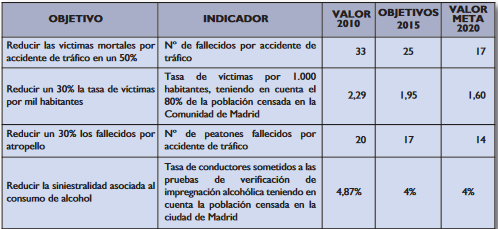

In [205]:
from IPython.display import display, Image
display(Image(filename='../img/Objetivos.png'))

* Reducir las víctimas mortales poraccidente de tráfico en un 50%

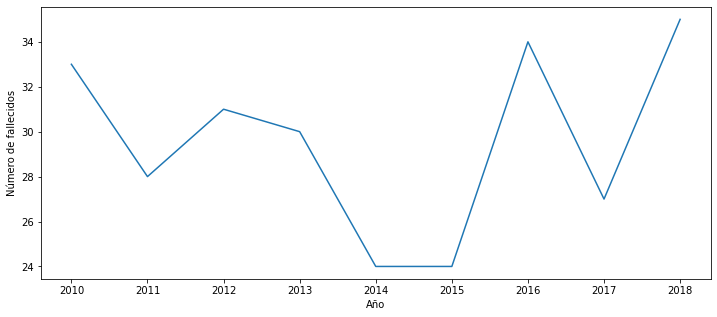

In [183]:
filtered_data=merged_data[(merged_data['LESIVIDAD'].isin(['MT']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='count');
figure=plt.figure(figsize=(12,5))

plt.ylabel('Número de fallecidos')
plt.xlabel('Año')
plt.plot(pt);


* Reducir un 30% la tasa de víctimas por mil habitantes

,VICTIMAS,vict_mil
ANO,,
2010,11845,2.313477
2011,12029,2.349414
2012,11824,2.309375
2013,11928,2.329687
2014,12434,2.428516
2015,12453,2.432227
2016,12774,2.494922
2017,13124,2.563281
2018,13430,2.623047


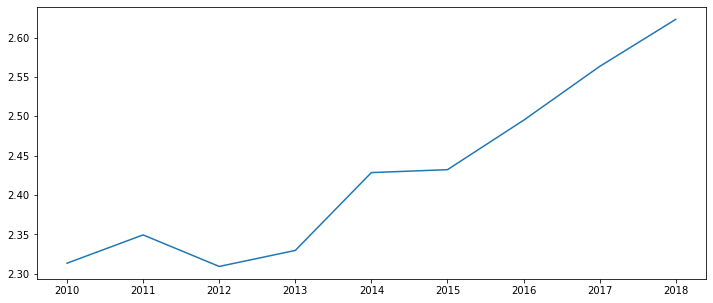

In [184]:
def victimas_mil_habitantes(num_victimas):
    poblacion=6400000*0.8
    victimas_mil_habitantes=num_victimas/(poblacion/1000)
    return victimas_mil_habitantes                       
victimas_mil_habitantes(10000)

filtered_data=merged_data.drop_duplicates(subset='Nº PARTE',keep='first')
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');

pt['vict_mil']=pt['VICTIMAS'].apply(lambda x:victimas_mil_habitantes(x))
figure=plt.figure(figsize=(12,5))
plt.plot(pt['vict_mil'])
pt

* Reducir un 30% los fallecidos poratropello 

,VICTIMAS
ANO,
2010,26
2011,18
2012,26
2013,39
2014,13
2015,12
2016,20
2017,21
2018,19


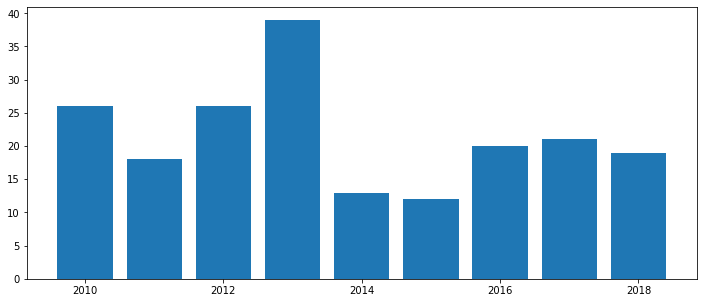

In [182]:
filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['MT']))]
plt.figure(figsize=(12,5))
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');

plt.bar(height=pt['VICTIMAS'],x=pt.index)
pt

<BarContainer object of 9 artists>

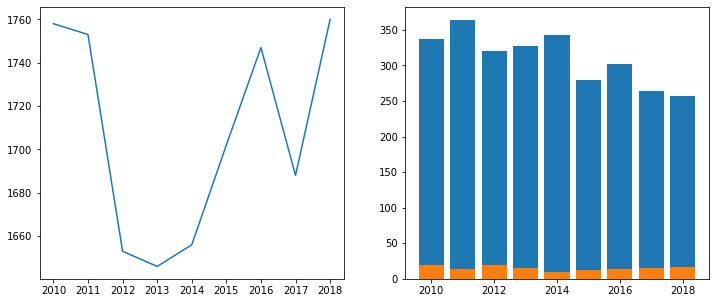

In [174]:

filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['HG','MT','HL']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')

plt.figure(figsize=(12,5))
plt.subplot(121)
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');
plt.plot(pt)
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',columns='LESIVIDAD',aggfunc='count')
ax=plt.subplot(122)

ax.bar(height=pt.HG,x=pt.index,align='center')
ax.bar(height=pt.MT,x=pt.index,align='center')



AÑO
2014    167625
2015    165663
2016    172998
2017    184935
2018    158988
2019         0
Name: N_PRUEBAS, dtype: int64

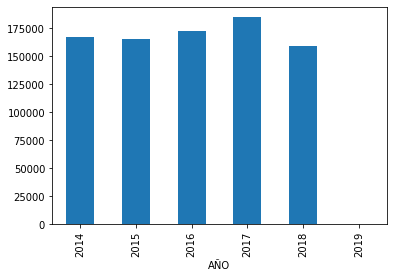

In [58]:
pruebas_alcoholemia_año=pruebas_alcoholemia.groupby(by='AÑO').sum()['N_PRUEBAS']
pruebas_alcoholemia_año.plot(kind='bar')
pruebas_alcoholemia_año

In [56]:
conductores=merged_data[(merged_data['TIPO PERSONA']=='CONDUCTOR') & (merged_data['Edad']>18)]

conductores['Edad'].plot(kind='hist')

KeyError: 'TIPO PERSONA'